In [ ]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import importlib
import logging
import hdf5view

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

from utilities.baseclass import BaseClass
from utilities.baseevaluation import BaseEvaluation
from utilities.baseplot import BasePlot
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.baseclass"])
importlib.reload(sys.modules["utilities.baseevaluation"])
importlib.reload(sys.modules["utilities.baseplot"])
importlib.reload(sys.modules["utilities.ivevaluation"])

import utilities.basefunctions
importlib.reload(sys.modules["utilities.basefunctions"])

from utilities.corporate_design_colors_v4 import cmap
importlib.reload(sys.modules["utilities.corporate_design_colors_v4"])

importlib.reload(logging)
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format="%(message)s")

: 

In [2]:
# Test BaseClass
from utilities.baseclass import BaseClass
importlib.reload(sys.modules["utilities.baseclass"])

eva = BaseClass()
eva.title = "Amplitude Study (7.8GHz)"
eva.sub_folder = "amplitude study"
eva.file_directory = "/Users/oliver/Documents/measurement data/"
eva.file_folder = "23 10 PR22e9/2023-11-02-high_Tau_2_G0/"
eva.file_name = "2023-11-02_high_tau_2_G0_stripline.hdf5"
eva.showData()

(base) ... BaseClass initialized.
(base) showData()


{'base': {'title': 'Amplitude Study (7.8GHz)',
  'sub_folder': 'amplitude study',
  'data_folder': 'data/',
  'figure_folder': 'figures/',
  'ignore_while_saving': ['_base_name', '_base_plot_name'],
  'file_directory': '/Users/oliver/Documents/measurement data/',
  'file_folder': '23 10 PR22e9/2023-11-02-high_Tau_2_G0/',
  'file_name': '2023-11-02_high_tau_2_G0_stripline.hdf5'}}

In [3]:
# Test BaseEvaluation
from utilities.baseevaluation import BaseEvaluation
importlib.reload(sys.modules["utilities.baseevaluation"])
eva = BaseEvaluation()
eva.title = "Amplitude Study (7.8GHz)"
eva.sub_folder = "amplitude study"
eva.file_directory = "/Users/oliver/Documents/measurement data/"
eva.file_folder = "23 10 PR22e9/2023-11-02-high_Tau_2_G0/"
eva.file_name = "2023-11-02_high_tau_2_G0_stripline.hdf5"
eva.showData()
# eva.showAmplifications()
eva.setAmplifications(10000, 1000)
# eva.showMeasurements()
eva.setMeasurement("frequency_at_-25dBm")
# eva.showKeys()
eva.setKeys(3, -3, 1e9, "nu=0.000GHz")
# eva.addKey("nu=0.000GHz", 0)
eva.showData()

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(base) showData()
(base eva) setKeys(3, -3, 1000000000.0, nu=0.000GHz)
(base) showData()


{'base': {'title': 'Amplitude Study (7.8GHz)',
  'sub_folder': 'amplitude study',
  'data_folder': 'data/',
  'figure_folder': 'figures/',
  'ignore_while_saving': ['_base_name', '_base_plot_name'],
  'file_directory': '/Users/oliver/Documents/measurement data/',
  'file_folder': '23 10 PR22e9/2023-11-02-high_Tau_2_G0/',
  'file_name': '2023-11-02_high_tau_2_G0_stripline.hdf5'},
 '_base_eva_name': 'base eva',
 'possible_measurement_keys': {'magnetic_fields': [7, -2, 0.001, 'no_field'],
  'temperatures': [7, -3, 1e-06, 'no_heater'],
  'temperatures_up': [7, -2, 1e-06, 'no_heater'],
  'gate_voltages': [5, -2, 0.001, 'no_gate']},
 'base_evaluation': {'voltage_amplification_1': 10000,
  'voltage_amplification_2': 1000,
  'reference_resistor': 51689.0,
  'index_trigger_up': 1,
  'index_trigger_down': 2,
  'measurement_key': 'frequency_at_-25dBm',
  'specific_keys': ['nu=0.100GHz',
   'nu=0.200GHz',
   'nu=0.300GHz',
   'nu=0.400GHz',
   'nu=0.500GHz',
   'nu=0.600GHz',
   'nu=0.700GHz',
   

In [4]:
# Test IVEvaluation
from utilities.ivevaluation import IVEvaluation
importlib.reload(sys.modules["utilities.ivevaluation"])
eva = IVEvaluation()
eva.title = "Frequency Study (-20dBm)"
eva.sub_folder = "frequency study"
eva.file_directory = "/Users/oliver/Documents/measurement data/"
eva.file_folder = "23 10 PR22e9/2023-11-02-high_Tau_2_G0/"
eva.file_name = "2023-11-02_high_tau_2_G0_stripline.hdf5"

eva.setAmplifications(10000, 1000)
eva.setMeasurement("frequency_at_-25dBm")
eva.setKeys(3, -3, 1, "nu=0.000GHz")
eva.setV(0.8e-3, voltage_bins=1600)
eva.setI(1.8e-7, current_bins=1800)
eva.up_sweep, eva.down_sweep = eva.getMaps([2,1])
eva.saveData()


(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base eva) setKeys(3, -3, 1, nu=0.000GHz)
(iv eva) getMaps()
100%|██████████| 200/200 [00:02<00:00, 69.12it/s]


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
# Test IV Plotting
%matplotlib qt
from utilities.ivplot import IVPlot
importlib.reload(sys.modules["utilities.ivplot"])
plt.close("all")
eva = IVPlot()

eva.title = "Frequency Study (-20dBm)"
eva.sub_folder = "frequency study"
eva.loadData()
# eva.showData()
eva.to_plot = eva.up_sweep
fig, axs = plt.subplots(6,3)
axs[0,0] = eva.ax_v_t_tuples(ax=axs[0,0], index=1)
axs[0,1] = eva.ax_i_t_tuples(ax=axs[0,1], index=1)
axs[0,2] = eva.ax_v_i_tuples(ax=axs[0,2], index=1)
axs[1,0] = eva.ax_i_v(ax=axs[1,0], index=0)
axs[1,1] = eva.ax_v_i(ax=axs[1,1], index=0)
axs[2,0] = eva.ax_didv_v(ax=axs[2,0], index=0)
axs[2,1] = eva.ax_dvdi_i(ax=axs[2,1], index=0)
axs[3,0] = eva.ax_T_v(ax=axs[3,0], index=0)
axs[3,1] = eva.ax_T_i(ax=axs[3,1], index=0)
axs[4,0], axs[4,1] = eva.ax_didv_vy(faxs=[fig, axs[4,0], axs[4,1]])
axs[4,2] = eva.ax_T_y(ax=axs[4,2])
axs[5,0], axs[5,1] = eva.ax_dvdi_iy(faxs=[fig, axs[5,0], axs[5,1]])
axs[5,2] = eva.ax_T_y(ax=axs[5,2])

axs[2,0].sharex(axs[1,0])
axs[2,1].sharex(axs[1,1])
axs[3,0].sharex(axs[1,0])
axs[3,1].sharex(axs[1,1])

axs[4,0].sharex(axs[1,0])
axs[5,0].sharex(axs[1,1])

plt.tight_layout()
plt.show()

(base) ... BaseClass initialized.
(base plot) ... BasePlot initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(iv plot) ... BasePlot initialized.
(base) loadData()


# Evaluation for OI-25c-09
### unbroken

In [101]:
# Evaluation for unbroken
from utilities.ivevaluation import IVEvaluation
importlib.reload(sys.modules["utilities.ivevaluation"])

# eva = IVEvaluation()
# eva.file_directory = "/Users/oliver/Documents/measurement data/"
# eva.file_folder = "/25 04 OI-25c-09/unbroken/"
# eva.file_name = "OI-25c-09 2025-04-15 unbroken 0.hdf5"
# eva.setAmplifications(1000, 1000)
# eva.setV(1.7e-3, voltage_bins=2020)
# eva.setI(30e-9, current_bins=1800)
# eva.showMeasurements()

# # Magnetic Field Study
# eva.title = "Magnetic Field Study"
# eva.sub_folder = "magnetic field study"
# eva.eva_even_spaced = True
# eva.setMeasurement("magnetic_fields")
# eva.showKeys()
# eva.setKeys(index_0=7, index_1=-2, norm=1e0, to_pop="no_field")
# eva.up_sweep, = eva.getMaps([1])
# eva.saveData()
# eva.eva_even_spaced = False

# # Amplitude Study (7.8GHz)
# eva.title = "Amplitude Study (7.8GHz)"
# eva.sub_folder = "amplitude study"
# eva.setMeasurement("vna_amplitudes_7.8000GHz")
# eva.showKeys()
# eva.setKeys(index_0=-6, index_1=-1, norm=1e0, to_pop="no_irradiation")
# eva.addKey("no_irradiation", 0)
# eva.up_sweep, = eva.getMaps([1])
# eva.saveData()

# # Amplitude Study (15GHz)
# eva.title = "Amplitude Study (15GHz)"
# eva.sub_folder = "amplitude study"
# eva.setMeasurement("vna_amplitudes_15.0000GHz")
# eva.showKeys()
# eva.setKeys(index_0=-6, index_1=-1, norm=1e0, to_pop="no_irradiation")
# eva.addKey("no_irradiation", 0)
# eva.up_sweep, = eva.getMaps([1])
# eva.saveData()

# # Amplitude Study (19.3GHz)
# eva.title = "Amplitude Study (19.3GHz)"
# eva.sub_folder = "amplitude study"
# eva.setMeasurement("vna_amplitudes_19.3000GHz")
# eva.showKeys()
# eva.setKeys(index_0=-6, index_1=-1, norm=1e0, to_pop="no_irradiation")
# eva.addKey("no_irradiation", 0)
# eva.up_sweep, = eva.getMaps([1])
# eva.saveData()

# # Frequency Study (0.1V)
# eva.title = "Frequency Study (0.1V)"
# eva.sub_folder = "frequency study"
# eva.setMeasurement("vna_frequencies_0.100V")
# eva.showKeys()
# eva.setKeys(index_0=4, index_1=-10, norm=1e9, to_pop="no_irradiation")
# eva.up_sweep, = eva.getMaps([1])
# eva.saveData()


# # Single IV Study
# eva.title = "Single IV (0mT) (fast)"
# eva.sub_folder = "single IV study"
# eva.setMeasurement('fast_single_IV magnet_+0.00mT')
# eva.up_sweep = eva.get_empty_dictionary()
# eva.up_sweep["plain"] = eva.getSingleIV(y_key="", specific_trigger=1)
# eva.saveData()

# # Single IV Study
# eva.title = "Single IV (100mT) (fast)"
# eva.sub_folder = "single IV study"
# eva.setMeasurement('fast_single_IV magnet_+100.00mT')
# eva.up_sweep = eva.get_empty_dictionary()
# eva.up_sweep["plain"] = eva.getSingleIV(y_key="", specific_trigger=1)
# eva.saveData()

# eva.setV(8e-3, voltage_bins=4000)
# eva.setI(100e-9, current_bins=1000)

# # Single IV Study
# eva.title = "Single IV (0mT)"
# eva.sub_folder = "single IV study"
# eva.setMeasurement('single_IV magnet_+0.00mT')
# eva.up_sweep = eva.get_empty_dictionary()
# eva.up_sweep["plain"] = eva.getSingleIV(y_key="", specific_trigger=1)
# eva.saveData()

# # Single IV Study
# eva.title = "Single IV (100mT)"
# eva.sub_folder = "single IV study"
# eva.setMeasurement('single_IV magnet_+100.00mT')
# eva.up_sweep = eva.get_empty_dictionary()
# eva.up_sweep["plain"] = eva.getSingleIV(y_key="", specific_trigger=1)
# eva.saveData()

eva.file_name = "OI-25c-09 2025-04-15 unbroken 1.hdf5"
eva.setV(1.7e-3, voltage_bins=2020)
eva.setI(30e-9, current_bins=1800)

# Temperature Study
eva.title = "Temperature Study"
eva.sub_folder = "temperature study"
eva.setMeasurement("temperatures")
eva.showKeys()
eva.setKeys(index_0=7, index_1=-3, norm=1e-6, to_pop="no_heater")
eva.up_sweep, = eva.getMaps([1])
eva.up_sweep, = eva.getMapsTemperature([eva.up_sweep])
eva.y_axis = eva.temperature_axis
eva.saveData()

# Frequency Study (0.2V)
eva.title = "Frequency Study (0.2V)"
eva.sub_folder = "frequency study"
eva.setMeasurement("vna_frequencies_0.200V")
eva.showKeys()
eva.setKeys(index_0=4, index_1=-10, norm=1e9, to_pop="no_irradiation")
eva.up_sweep, = eva.getMaps([1])
eva.saveData()

(base eva) Measurement keys preview: ['heater_00000.013muW', 'heater_00000.070muW', 'heater_03135.622muW', 'no_heater']
(base eva) setKeys(7, -3, 1e-06, no_heater)
(iv eva) getMaps()
100%|██████████| 150/150 [00:09<00:00, 16.21it/s]
(iv eva) getMapsTemperature()
(base) saveData()
(base eva) Measurement keys preview: ['no_irradiation', 'vna_1.0000GHz_0.200V', 'vna_9.8000GHz_0.200V', 'vna_9.9000GHz_0.200V']
(base eva) setKeys(4, -10, 1000000000.0, no_irradiation)
(iv eva) getMaps()
100%|██████████| 191/191 [00:16<00:00, 11.55it/s]
(base) saveData()


In [6]:
# Execute IVPlotting
%matplotlib qt
from utilities.ivplot import IVPlot
importlib.reload(sys.modules["utilities.ivplot"])

i = 0
eva = IVPlot()

eva.title = "Temperature Study"
eva.sub_folder = "temperature study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$T$", "K"]
eva.smoothing = True
eva.window_length = 40
eva.plot_all(leading_index=i)
i += 10

eva.title = "Magnetic Field Study"
eva.sub_folder = "magnetic field study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$\mu_0H$", "T"]
eva.smoothing = True
eva.window_length = 40
eva.plot_all(leading_index=i)
i += 10

eva.title = "Amplitude Study (7.8GHz)"
eva.sub_folder = "amplitude study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$V_\mathrm{AC}$", "V"]
eva.smoothing = True
eva.window_length = 40
eva.plot_all(leading_index=i)
i += 10

eva.title = "Amplitude Study (15GHz)"
eva.sub_folder = "amplitude study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$V_\mathrm{AC}$", "V"]
eva.smoothing = True
eva.window_length = 40
eva.plot_all(leading_index=i)
i += 10

eva.title = "Amplitude Study (19.3GHz)"
eva.sub_folder = "amplitude study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$V_\mathrm{AC}$", "V"]
eva.smoothing = True
eva.window_length = 40
eva.plot_all(leading_index=i)
i += 10

eva.title = "Frequency Study (0.1V)"
eva.sub_folder = "frequency study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$\nu_\mathrm{AC}$", "Hz"]
eva.smoothing = True
eva.window_length = 40
eva.plot_all(leading_index=i)
i += 10

eva.title = "Frequency Study (0.2V)"
eva.sub_folder = "frequency study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$\nu_\mathrm{AC}$", "Hz"]
eva.smoothing = True
eva.window_length = 40
eva.plot_all(leading_index=i)
i += 10

eva.title = "Single IV (0mT) (fast)"
eva.sub_folder = "single IV study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.fig_ididv_v(fig_nr=i+5)
# i += 10




(base) ... BaseClass initialized.
(base plot) ... BasePlot initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(iv plot) ... BasePlot initialized.
(base) loadData()
(iv plot) smoothing = True
(iv plot) window_length = 40
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base) loadData()
(iv plot) smoothing = True
(iv plot) window_length = 40
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base) loadData()
(iv plot) smoothing = True
(iv plot) window_length = 40
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base) loadData()
(iv plot) smoothing = True
(iv plot) window_length = 40
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base) loadData()
(iv plot) smoothing = True
(iv plot) window_length = 40
(base plot) saveFigure()
(base plot) sav

(<Figure size 1200x800 with 3 Axes>,
 array([[<Axes: >, <Axes: xlabel='$V$ (mV)', ylabel='d$I$/d$V$ (m$G_0$)'>],
        [<Axes: xlabel='d$V$/d$I$ (M$\\Omega$)', ylabel='$I$ (nA)'>,
         <Axes: xlabel='$V$ (mV)', ylabel='$I$ (nA)'>]], dtype=object))

2025-04-17 18:57:04.615 Python[98646:5823535] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [100]:
eva.y_axis

array([1.300000e-08, 7.000000e-08, 1.930000e-07, 3.930000e-07,
       6.830000e-07, 1.074000e-06, 1.573000e-06, 2.191000e-06,
       2.933000e-06, 3.809000e-06, 4.824000e-06, 5.985000e-06,
       7.299000e-06, 8.771000e-06, 1.040700e-05, 1.221300e-05,
       1.419300e-05, 1.635400e-05, 1.869900e-05, 2.123500e-05,
       2.396500e-05, 2.689400e-05, 3.002700e-05, 3.336900e-05,
       3.692200e-05, 4.069200e-05, 4.468300e-05, 4.889900e-05,
       5.334300e-05, 5.802000e-05, 6.293300e-05, 6.808600e-05,
       7.348300e-05, 7.912800e-05, 8.502300e-05, 9.117300e-05,
       9.758100e-05, 1.042500e-04, 1.111840e-04, 1.183860e-04,
       1.258590e-04, 1.336070e-04, 1.416320e-04, 1.499380e-04,
       1.585280e-04, 1.674060e-04, 1.765730e-04, 1.860330e-04,
       1.957900e-04, 2.058450e-04, 2.162020e-04, 2.268640e-04,
       2.378340e-04, 2.491140e-04, 2.607070e-04, 2.726160e-04,
       2.848440e-04, 2.973940e-04, 3.102670e-04, 3.234670e-04,
       3.369970e-04, 3.508590e-04, 3.650550e-04, 3.7958

In [10]:
423*(150+111+400+400+199+199+159+141+141)/3600/24

9.302083333333334

In [4]:
i, v, t = eva.get_ivt(plain=True)
i, v, v.shape

(array([ 1.15269705e-07,  1.15249659e-07,  1.15209807e-07, ...,
        -1.15218842e-07, -1.15520771e-07, -1.15192624e-07]),
 array([ 0.00778724,  0.00779283,  0.0077961 , ..., -0.0078367 ,
        -0.0078336 , -0.00783516]),
 (730813,))

In [14]:
import numpy as np

def time_to_freq(i, v, t):
    """
    Convert time-domain current and voltage to frequency-domain magnitude spectra.
    
    Parameters:
        i (array-like): Current signal in time domain
        v (array-like): Voltage signal in time domain
        t (array-like): Time vector (uniformly spaced)
        
    Returns:
        f (np.ndarray): Frequency vector (Hz)
        I_f (np.ndarray): Current amplitude spectrum
        V_f (np.ndarray): Voltage amplitude spectrum
    """
    i = np.asarray(i)
    v = np.asarray(v)
    t = np.asarray(t)

    # Sample spacing
    dt = t[1] - t[0]
    N = len(t)

    # Frequency vector
    f = np.fft.rfftfreq(N, d=dt)

    # FFT and take magnitude
    I_f = np.abs(np.fft.rfft(i))
    V_f = np.abs(np.fft.rfft(v))

    return f, I_f, V_f

f, i_f, v_f = time_to_freq(i, v, t)
plt.semilogy(f, i_f)
plt.semilogy(f, v_f)

In [15]:
from utilities.basefunctions import bin_y_over_x
importlib.reload(sys.modules["utilities.basefunctions"])

def name(i, v, t, down_sample_freq=63):
    """
    Downsample the current and voltage signals to a specified frequency.
    """
    t_short = np.arange(np.min(t), np.max(t), 1/down_sample_freq)
    i_short, i_count = bin_y_over_x(t, i, t_short)
    v_short, v_count = bin_y_over_x(t, v, t_short)

    print(np.nanmean(np.concatenate((i_count, v_count), axis=0), axis=0))

    return i_short, v_short, t_short, i_count, v_count

i_short, v_short, t_short, i_count, v_count = name(i, v, t)


f, i_f, v_f = time_to_freq(i_short, v_short, t_short)

plt.close('all')
plt.figure(0)
plt.plot(v,i, 'b.-')
plt.plot(v_short, i_short, 'ro')
plt.figure(1)
plt.semilogy(f, i_f)
plt.semilogy(f, v_f)
plt.figure(2)
plt.plot(t_short, i_count, 'b-')
plt.plot(t_short, v_count, 'r-')

63.427616733206044


In [9]:
1/(t[1]-t[0])

np.float64(4002.1984732824426)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Simulated noisy IV data
# np.random.seed(42)
# i = np.linspace(-2, 2, 1000)
# v_clean = np.tanh(i)
# v = v_clean + np.random.normal(scale=0.2, size=i.shape)

data = np.vstack([i_short, v_short])

# Perform 2D KDE
kde = gaussian_kde(data)
xi, yi = np.linspace(i.min(), i.max(), 1000), np.linspace(v.min(), v.max(), 1000)
xi_grid, yi_grid = np.meshgrid(xi, yi)
positions = np.vstack([xi_grid.ravel(), yi_grid.ravel()])
density = kde(positions).reshape(xi_grid.shape)

# Find max density point in each column (i.e., for each current)
ridge_indices = np.argmax(density, axis=0)
v_ridge = yi[ridge_indices]

# Plot
plt.figure(figsize=(8, 5))
plt.pcolormesh(xi, yi, density, shading='auto', cmap='plasma')
plt.plot(xi, v_ridge, color='cyan', lw=2, label="Extracted IV Ridge")
plt.plot(i, v, '.', alpha=0.1, label="Noisy data", color='white')
plt.xlabel("Current (I)")
plt.ylabel("Voltage (V)")
plt.title("IV Curve via KDE Ridge Detection")
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_89942/2432537892.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


In [ ]:
%matplotlib qt
from utilities.ivplot import IVPlot
importlib.reload(sys.modules["utilities.ivplot"])
plt.close("all")

eva = IVPlot()
eva.title = "Frequency Study (-20dBm)"
eva.sub_folder = "frequency study"
eva.loadData()

eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$\nu$", "GHz"]
fig, axs = eva.fig_didv(z_lim=(None, None))
fig, axs = eva.fig_dvdi(z_lim=(None, None))
# fig, axs = eva.fig_didv_T(z_lim=(None, None))

eva.ax_T_vy()

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(iv plot) ... BasePlot initialized.
(base) loadData()


(<Axes: xlabel='$V$ (V)', ylabel='$\\nu$ (GHz)'>, <Axes: ylabel='$T$ (mK)'>)

In [ ]:
# Test IVEvaluation
from utilities.ivevaluation import IVEvaluation
importlib.reload(sys.modules["utilities.ivevaluation"])
eva = IVEvaluation()
eva.title = "Power Study (15GHz)"
eva.sub_folder = "power study"
eva.file_directory = "/Users/oliver/Documents/measurement data/"
eva.file_folder = "23 10 PR22e9/2023-11-02-high_Tau_2_G0/"
eva.file_name = "2023-11-02_high_tau_2_G0_stripline.hdf5"
eva.setAmplifications(10000, 1000)
eva.showMeasurements()
eva.setMeasurement("frequency_at_15GHz")
eva.showKeys()
eva.setKeys([3, -3, 1, None])
eva.setV(0.8e-3, voltage_bins=1600)
eva.setI(1.8e-7, current_bins=1800)
eva.up_sweep, eva.down_sweep = eva.getMaps([2,1])
eva.saveData()


(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base eva) Available measurements: ['critical field', 'frequency_at_-20dBm', 'frequency_at_-25dBm', 'frequency_at_15GHz', 'frequency_at_19.3GHz', 'frequency_at_7.8GHz']
(base eva) Measurement keys preview: ['nu=-1.0dBm', 'nu=-10.0dBm', 'nu=-9.0dBm', 'nu=0.0dBm']
(base eva) setKeys([3, -3, 1, None])
(base eva) Key to pop is not found.
(iv eva) getMaps()
100%|██████████| 32/32 [00:00<00:00, 57.28it/s]
(base) saveData()


In [ ]:
%matplotlib qt
from utilities.ivplot import IVPlot
importlib.reload(sys.modules["utilities.ivplot"])
plt.close("all")

eva = IVPlot()
eva.title = "Power Study (15GHz)"
eva.sub_folder = "power study"
eva.loadData()

eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$P_\mathrm{AC}$", "dBm"]
fig, axs = eva.fig_didv(z_lim=(None, None))
# fig, axs = eva.fig_dvdi(z_lim=(None, None))
# fig, axs = eva.fig_didv_T(z_lim=(None, None))

# eva.ax_T_vy()

(base) ... BaseClass initialized.
(base plot) ... BasePlot initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(iv plot) ... BasePlot initialized.
(base) loadData()


In [ ]:
# Test IVEvaluation
from utilities.ivevaluation import IVEvaluation
importlib.reload(sys.modules["utilities.ivevaluation"])
eva = IVEvaluation()

eva.file_directory = "/Users/oliver/Documents/measurement data/"
eva.file_folder = "23 10 PR22e9/2023-11-02-high_Tau_2_G0/"
eva.file_name = "2023-11-02_high_tau_2_G0_stripline.hdf5"

eva.setAmplifications(10000, 1000)
eva.showMeasurements()
eva.setMeasurement("frequency_at_15GHz")
eva.showKeys()
eva.setKeys([3, -3, 1, "nu=-31.0dBm"])
eva.addKey("nu=-31.0dBm", -100)
eva.setV(0.8e-3, voltage_bins=1600)
eva.setI(1.8e-7, current_bins=1800)

eva.title = "Power Study (15GHz)"
eva.sub_folder = "power study"
eva.up_sweep, eva.down_sweep = eva.getMaps([2,1])
eva.saveData()

eva.title = "Amplitude Study (15GHz)"
eva.sub_folder = "amplitude study"
eva.up_sweep, eva.down_sweep = eva.getMapsAmplitude([eva.up_sweep, eva.down_sweep])
eva.y_axis = eva.amplitude_axis
eva.saveData()


(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base eva) Available measurements: ['critical field', 'frequency_at_-20dBm', 'frequency_at_-25dBm', 'frequency_at_15GHz', 'frequency_at_19.3GHz', 'frequency_at_7.8GHz']
(base eva) Measurement keys preview: ['nu=-1.0dBm', 'nu=-10.0dBm', 'nu=-9.0dBm', 'nu=0.0dBm']
(base eva) setKeys([3, -3, 1, 'nu=-31.0dBm'])
(base eva) addKey('nu=-31.0dBm', -100.000000)
(iv eva) getMaps()
100%|██████████| 32/32 [00:00<00:00, 46.34it/s]
(base) saveData()
(iv eva) getMapsAmplitude()
(base) saveData()


In [177]:
eva.y_axis.max(), eva.amplitude_axis.max()

(np.float64(0.25), np.float64(0.25))

In [ ]:
%matplotlib qt
from utilities.ivplot import IVPlot
importlib.reload(sys.modules["utilities.ivplot"])
plt.close("all")

eva = IVPlot()
eva.title = "Amplitude Study (15GHz)"
eva.sub_folder = "amplitude study"
eva.loadData()
print(eva.y_axis, eva.amplitude_axis)
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$V_\mathrm{AC}$", "V"]
fig, axs = eva.fig_didv_T(z_lim=(None, None))
# fig, axs = eva.fig_dvdi(z_lim=(None, None))
# fig, axs = eva.fig_didv_T(z_lim=(None, None))

# eva.ax_T_vy()

(base) ... BaseClass initialized.
(base plot) ... BasePlot initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(iv plot) ... BasePlot initialized.
(base) loadData()


[0.         0.00166667 0.00333333 0.005      0.00666667 0.00833333
 0.01       0.01166667 0.01333333 0.015      0.01666667 0.01833333
 0.02       0.02166667 0.02333333 0.025      0.02666667 0.02833333
 0.03       0.03166667 0.03333333 0.035      0.03666667 0.03833333
 0.04       0.04166667 0.04333333 0.045      0.04666667 0.04833333
 0.05       0.05166667 0.05333333 0.055      0.05666667 0.05833333
 0.06       0.06166667 0.06333333 0.065      0.06666667 0.06833333
 0.07       0.07166667 0.07333333 0.075      0.07666667 0.07833333
 0.08       0.08166667 0.08333333 0.085      0.08666667 0.08833333
 0.09       0.09166667 0.09333333 0.095      0.09666667 0.09833333
 0.1        0.10166667 0.10333333 0.105      0.10666667 0.10833333
 0.11       0.11166667 0.11333333 0.115      0.11666667 0.11833333
 0.12       0.12166667 0.12333333 0.125      0.12666667 0.12833333
 0.13       0.13166667 0.13333333 0.135      0.13666667 0.13833333
 0.14       0.14166667 0.14333333 0.145      0.14666667 0.1483

In [ ]:


eva = IVPlot()
eva.title = "Power Study (15GHz)"
eva.sub_folder = "power study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$P_\mathrm{AC}$", "dBm"]
fig, axs = eva.fig_didv_T(z_lim=(None, None), fig_nr=1)

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(iv plot) ... BasePlot initialized.
(base) loadData()


(32,) 1.0  [-100.  -30.  -29.  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.
  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.
   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.]


The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.
The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.
The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.


In [ ]:

plt.plot(1, 1, color="k")

In [26]:
a = axs[4,0]
a.im


AttributeError: 'Axes' object has no attribute 'im'

In [ ]:
eva.up_sweep["plain"]

{'iv_tuples': [[array([ 3.96165177e-09,  1.26318458e-07,  1.72659227e-07, ...,
          -1.80090473e-07, -1.80024735e-07, -1.80064089e-07]),
   array([ 1.37801760e-05,  6.40179998e-04,  8.74620516e-04, ...,
          -9.04838770e-04, -9.05187529e-04, -9.04883307e-04]),
   array([1.69895006e+09, 1.69895006e+09, 1.69895006e+09, ...,
          1.69895008e+09, 1.69895008e+09, 1.69895008e+09])]],
 'temperature': array([0.08704578]),
 'time_start': array([1.69895006e+09]),
 'time_stop': array([1.69895008e+09]),
 'current': array([[-1.63516161e-07, -1.63248100e-07, -1.63221065e-07, ...,
          1.63409301e-07,  1.63640628e-07,  1.63800648e-07]]),
 'voltage': array([[nan, nan, nan, ..., nan, nan, nan]]),
 'time_current': array([[1.69895007e+09, 1.69895007e+09, 1.69895007e+09, ...,
         1.69895006e+09, 1.69895006e+09, 1.69895006e+09]]),
 'time_voltage': array([[nan, nan, nan, ..., nan, nan, nan]]),
 'temperature_current': array([[nan, nan, nan, ..., nan, nan, nan]]),
 'temperature_voltag

In [ ]:
fig, axs = plt.subplots(1,3)
axs[0] = eva.ax_vt(eva.up_sweep,ax=axs[0], index=0)
axs[1] = eva.ax_it(eva.up_sweep,ax=axs[1], index=0)
axs[2] = eva.ax_iv(eva.up_sweep,ax=axs[2], index=0)
plt.show()

2025-04-02 19:00:56.470 Python[74235:3897307] _TIPropertyValueIsValid called with 16 on nil context!
2025-04-02 19:00:56.470 Python[74235:3897307] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-04-02 19:00:56.470 Python[74235:3897307] Text input context does not respond to _valueForTIProperty:
2025-04-02 19:01:10.505 Python[74235:3897307] _TIPropertyValueIsValid called with 16 on nil context!
2025-04-02 19:01:10.505 Python[74235:3897307] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-04-02 19:01:10.505 Python[74235:3897307] Text input context does not respond to _valueForTIProperty:


In [147]:
axs[0], axs[1]

(<Axes: >, <Axes: >)

In [ ]:
def filter_frequency(f, filter_f:float = 50, delta_f:float = 1.5):

    max_f = np.nanmax(f)
    number_harmonics = int(max_f/filter_f)
    indices = np.ones(f.shape)

    for n in range(number_harmonics):
        indices *= np.logical_or(f <= (n+1)*filter_f-delta_f, f >= (n+1)*filter_f+delta_f)
    return indices

2025-04-01 21:47:21.761 Python[74235:3897307] _TIPropertyValueIsValid called with 16 on nil context!
2025-04-01 21:47:21.761 Python[74235:3897307] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-04-01 21:47:21.761 Python[74235:3897307] Text input context does not respond to _valueForTIProperty:
2025-04-01 21:47:38.553 Python[74235:3897307] _TIPropertyValueIsValid called with 16 on nil context!
2025-04-01 21:47:38.553 Python[74235:3897307] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-04-01 21:47:38.553 Python[74235:3897307] Text input context does not respond to _valueForTIProperty:


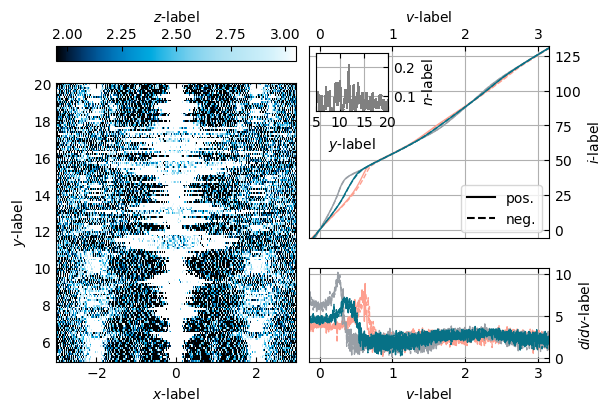

In [ ]:
from utilities.old.plot_all import plot_all
(fig, ax, _ ,_, _, _) = plot_all(indices = [0, 5, 10], 
         x = eva.mapped["voltage_axis"]/189e-6,
         y = eva.mapped["y_axis"],
         z = eva.up_sweep["differential_conductance"],
         v = eva.mapped["voltage_axis"]/189e-6,
         i = eva.up_sweep["current"]*1e9,
         didv = eva.up_sweep["differential_conductance"],
         n = eva.up_sweep["temperature_current"],
         x_lim = [-3, 3],
         y_lim = [5, 20],
         z_lim = [2, 3],
         v_lim = 3,
         i_lim = [0, 200],
         didv_lim = [0, 3],
         n_lim = [0.050, 0.250],
         )
plt.show()
import pickle
pickle.dump(fig, open("test.fig.pickle", "wb"))